# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [100]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import citipy
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [101]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

cities

Number of cities in the list: 618


['pante makasar',
 'kerikeri',
 'aden',
 'miragoane',
 'port-aux-francais',
 'lichinga',
 'blackmans bay',
 'port mathurin',
 'port lincoln',
 'georgetown',
 'grytviken',
 'ust-nera',
 'ebaye',
 'kyzyl-burun',
 'cockburn town',
 'solleftea',
 'puerto natales',
 'zaozersk',
 'qaqortoq',
 'peabiru',
 'kenora',
 "nuku'alofa",
 "st. john's",
 'sandnessjoen',
 'adamstown',
 'petropavlovsk-kamchatsky',
 'invercargill',
 'kingston',
 'longyearbyen',
 'ulaangom',
 'errachidia',
 'hami',
 'fauske',
 'saldanha',
 'ushuaia',
 'taiohae',
 'waitangi',
 'qalat',
 'luderitz',
 "'ohonua",
 'coquimbo',
 'bethel',
 'zusmarshausen',
 'somerset east',
 'urangan',
 'holualoa',
 'tolanaro',
 'shagonar',
 'klyuchi',
 'fale old settlement',
 'laojunmiao',
 'ihsaniye',
 'jamestown',
 'margaret river',
 'olonkinbyen',
 'iskateley',
 'olbia',
 'tazacorte',
 'new norfolk',
 'punta arenas',
 'luanda',
 'panacan',
 'keflavik',
 'chonchi',
 'mount isa',
 'west island',
 'axim',
 'anadyr',
 'yellowknife',
 'port doug

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [102]:
import requests

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units={unit}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Make API request
        response = requests.get(city_url)
        # Check if city is found
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()
            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather['coord']['lat']
            city_lng = city_weather['coord']['lon']
            city_max_temp = city_weather['main']['temp_max']
            city_humidity = city_weather['main']['humidity']
            city_clouds = city_weather['clouds']['all']
            city_wind = city_weather['wind']['speed']
            city_country = city_weather['sys']['country']
            city_date = city_weather['dt']
            
            # Append the City information into city_data list
            city_data.append({"City": city, 
                              "Lat": city_lat, 
                              "Lng": city_lng, 
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})
        else:
            print("City not found. Skipping...")
        
    # Handle exceptions
    except Exception as e:
        print(f"Error processing city {city}: {e}")

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | pante makasar
City not found. Skipping...
Processing Record 2 of Set 1 | kerikeri
Processing Record 3 of Set 1 | aden
Processing Record 4 of Set 1 | miragoane
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | lichinga
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | port mathurin
Processing Record 9 of Set 1 | port lincoln
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | ust-nera
Processing Record 13 of Set 1 | ebaye
Processing Record 14 of Set 1 | kyzyl-burun
City not found. Skipping...
Processing Record 15 of Set 1 | cockburn town
Processing Record 16 of Set 1 | solleftea
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | zaozersk
Processing Record 19 of Set 1 | qaqortoq
Processing Record 20 of Set 1 | peabiru
Processing Record 21 of Set 1 | kenora


In [103]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?q=dakhla&appid=2a2e608bfe4b007c50c972b59ed9201c&units=imperial


In [104]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [105]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kerikeri,-35.2268,173.9474,52.92,84,6,8.99,NZ,1715199581
1,aden,12.7794,45.0367,86.97,73,92,7.92,YE,1715199581
2,miragoane,18.4423,-73.0876,84.36,68,41,5.91,HT,1715199581
3,port-aux-francais,-49.3500,70.2167,40.44,74,90,18.97,TF,1715199581
4,lichinga,-13.3128,35.2406,64.49,72,0,9.22,MZ,1715199582


In [106]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [107]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,52.92,84,6,8.99,NZ,1715199581
1,aden,12.7794,45.0367,86.97,73,92,7.92,YE,1715199581
2,miragoane,18.4423,-73.0876,84.36,68,41,5.91,HT,1715199581
3,port-aux-francais,-49.3500,70.2167,40.44,74,90,18.97,TF,1715199581
4,lichinga,-13.3128,35.2406,64.49,72,0,9.22,MZ,1715199582


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

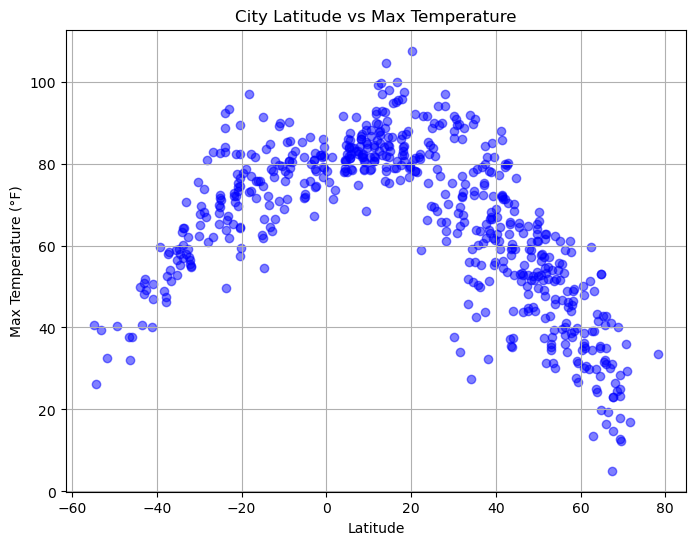

In [108]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color='blue', alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

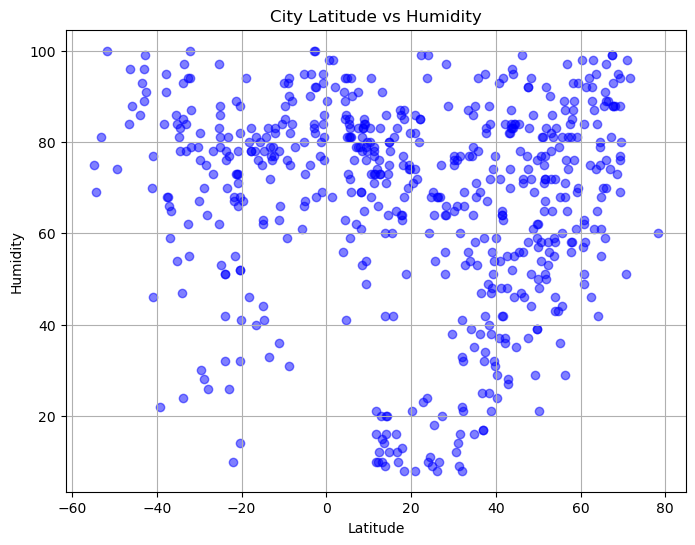

In [109]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize = (8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color = 'blue', alpha = 0.5)


# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

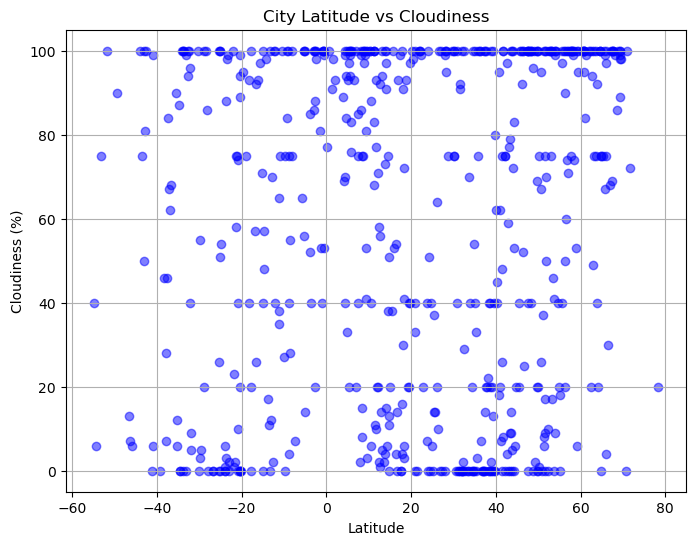

In [110]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize = (8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color = 'blue', alpha = 0.5)


# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

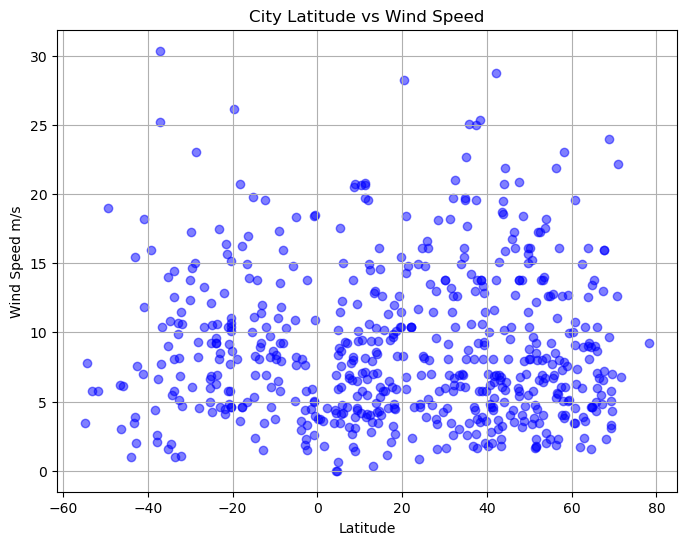

In [111]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize = (8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color = 'blue', alpha = 0.5)


# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed m/s")

plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [112]:
# Define a function to create Linear Regression plots

In [113]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,aden,12.7794,45.0367,86.97,73,92,7.92,YE,1715199581
2,miragoane,18.4423,-73.0876,84.36,68,41,5.91,HT,1715199581
8,georgetown,5.4112,100.3354,84.13,84,20,3.44,MY,1715199311
10,ust-nera,64.5667,143.2000,34.92,79,100,1.57,RU,1715199582
11,ebaye,8.7748,167.7392,82.42,83,75,20.71,MH,1715199582


In [114]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,52.92,84,6,8.99,NZ,1715199581
3,port-aux-francais,-49.3500,70.2167,40.44,74,90,18.97,TF,1715199581
4,lichinga,-13.3128,35.2406,64.49,72,0,9.22,MZ,1715199582
5,blackmans bay,-43.0167,147.3167,50.74,96,50,3.89,AU,1715199582
6,port mathurin,-19.6833,63.4167,77.79,67,95,26.17,MU,1715199582


###  Temperature vs. Latitude Linear Regression Plot

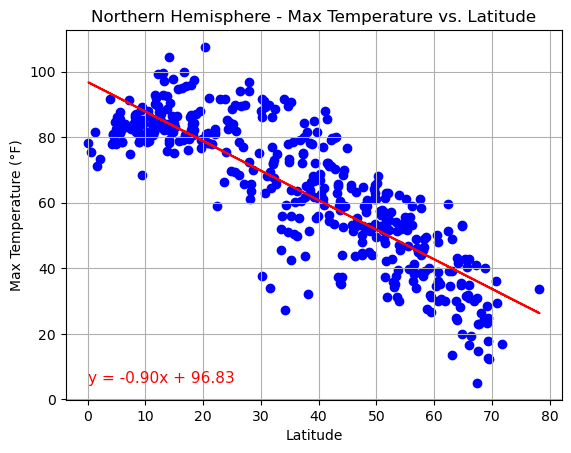

r-value is: -0.8412809223557834


In [123]:
# Linear regression on Northern Hemisphere
# Extract latitude and temperature data
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = slope * x_values + intercept

# Create a scatter plot of latitude vs. temperature
plt.scatter(x_values, y_values, color='blue', label='Data Points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Northern Hemisphere - Max Temperature vs. Latitude')

# Add model's formula and r-value to the plot
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"  # Model's formula
r_squared = f"R-squared = {rvalue**2:.2f}"       # r-value
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=11, color='red', ha='left')

plt.grid(True)

# Show plot
plt.show()
print("r-value is:", rvalue)

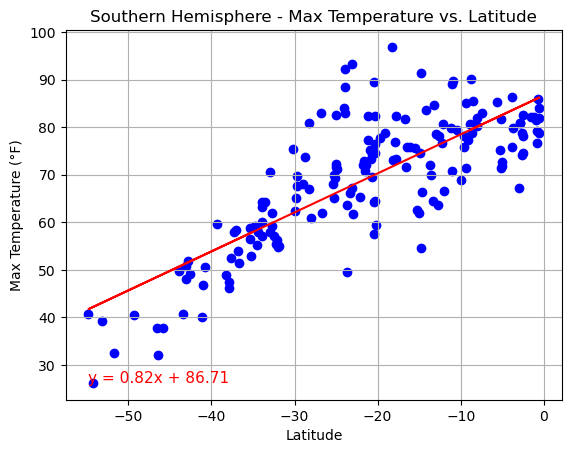

r-value is: 0.7923570533648856


In [122]:
# Linear regression on Southern Hemisphere
# Extract latitude and temperature data
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = slope * x_values + intercept

# Create a scatter plot of latitude vs. temperature
plt.scatter(x_values, y_values, color='blue', label='Data Points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Southern Hemisphere - Max Temperature vs. Latitude')

# Add model's formula and r-value to the plot
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"  # Model's formula
r_squared = f"R-squared = {rvalue**2:.2f}"       # r-value
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=11, color='red', ha='left')

plt.grid(True)

# Show plot
plt.show()
print("r-value is:", rvalue)

**Discussion about the linear relationship:** The scatter plot for the Northern Hemisphere reveals a negative relationship, while the data from the Southern Hemisphere exhibits a positive relationship. These findings suggest that as cities move farther away from the equator (latitude 0), maximum temperatures tend to decrease. Conversely, as cities approach the equator, maximum temperatures generally rise. This pattern underscores the significant influence of latitude on temperature variations across different regions, highlighting the role of proximity to the equator in shaping climatic conditions.

### Humidity vs. Latitude Linear Regression Plot

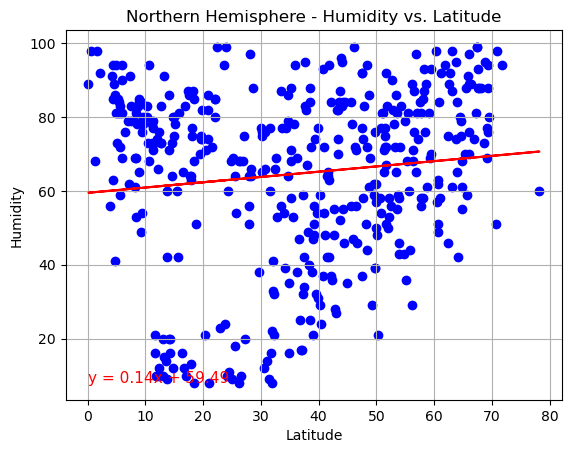

r-value is: 0.11976034287177116


In [121]:
# Northern Hemisphere
# Extract latitude and temperature data
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = slope * x_values + intercept

# Create a scatter plot of latitude vs. temperature
plt.scatter(x_values, y_values, color='blue', label='Data Points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity vs. Latitude')

# Add model's formula and r-value to the plot
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"  # Model's formula
r_squared = f"R-squared = {rvalue**2:.2f}"       # r-value
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=11, color='red', ha='left')

plt.grid(True)


# Show plot
plt.show()
print("r-value is:", rvalue)

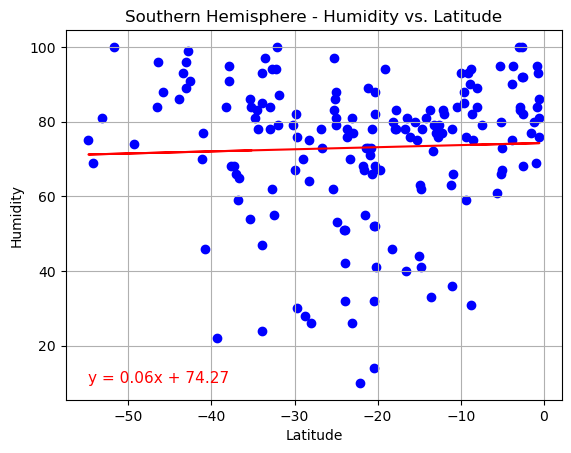

r-value is: 0.039565094181897235


In [120]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = slope * x_values + intercept

# Create a scatter plot of latitude vs. temperature
plt.scatter(x_values, y_values, color='blue', label='Data Points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude')

# Add model's formula and r-value to the plot
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"  # Model's formula
r_squared = f"R-squared = {rvalue**2:.2f}"       # r-value
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=11, color='red', ha='left')

plt.grid(True)



# Show plot
plt.show()
print("r-value is:", rvalue)

**Discussion about the linear relationship:** Examining the data from both the Northern and Southern hemisphere, it's evident that data points for humidity in relation to latitude are distributed across various points. Despite the disperison there isn't a strong change in regression line which indicates minimal variation. The consistency for both the Northern and Southern hemisphere plots suggest taht latitude isn't a significant influence on humidity levels. 

### Cloudiness vs. Latitude Linear Regression Plot

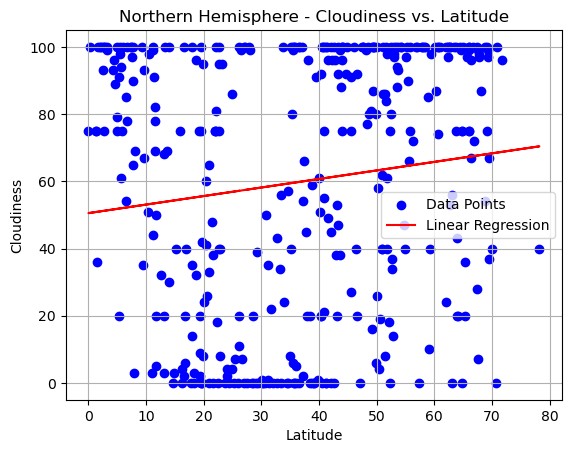

In [81]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = slope * x_values + intercept

# Create a scatter plot of latitude vs. temperature
plt.scatter(x_values, y_values, color='blue', label='Data Points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude')

# Add model's formula and r-value to the plot
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"  # Model's formula
r_squared = f"R-squared = {rvalue**2:.2f}"       # r-value
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=11, color='red', ha='left')

plt.grid(True)

# Add legend
plt.legend()

# Show plot
plt.show()
print("r-value is:", rvalue)

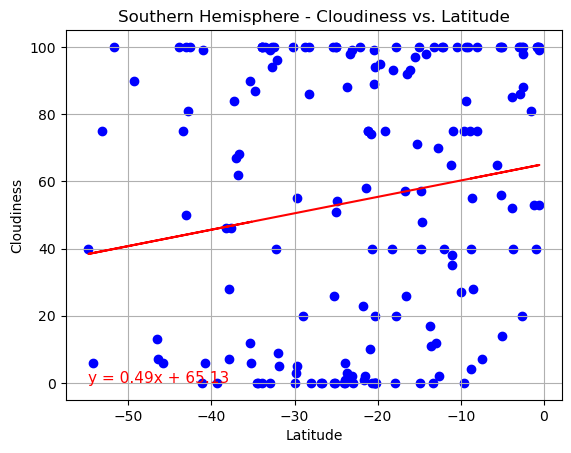

r-value is: 0.16374691692349852


In [124]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = slope * x_values + intercept

# Create a scatter plot of latitude vs. temperature
plt.scatter(x_values, y_values, color='blue', label='Data Points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude')

# Add model's formula and r-value to the plot
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"  # Model's formula
r_squared = f"R-squared = {rvalue**2:.2f}"       # r-value
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=11, color='red', ha='left')

plt.grid(True)

# Show plot
plt.show()
print("r-value is:", rvalue)

**Discussion about the linear relationship:** Analysis of cloudiness data across latitudes in both the Northern and Southern Hemispheres reveals a diverse distribution of data points. Notably, both linear regression lines demonstrate a positive correlation, suggesting that as cities move further north, cloudiness tends to increase. This association underscores the influence of latitude on cloud cover patterns, with northern regions experiencing higher levels of cloudiness compared to their southern counterparts. 

### Wind Speed vs. Latitude Linear Regression Plot

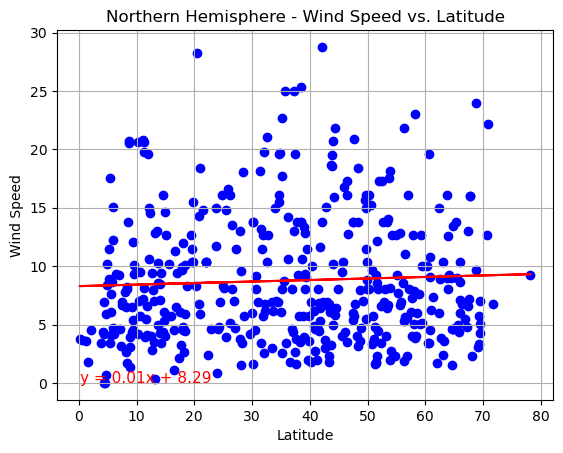

r-value is: 0.04695103086828899


In [125]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = slope * x_values + intercept

# Create a scatter plot of latitude vs. temperature
plt.scatter(x_values, y_values, color='blue', label='Data Points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude')

# Add model's formula and r-value to the plot
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"  # Model's formula
r_squared = f"R-squared = {rvalue**2:.2f}"       # r-value
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=11, color='red', ha='left')

plt.grid(True)

# Show plot
plt.show()
print("r-value is:", rvalue)

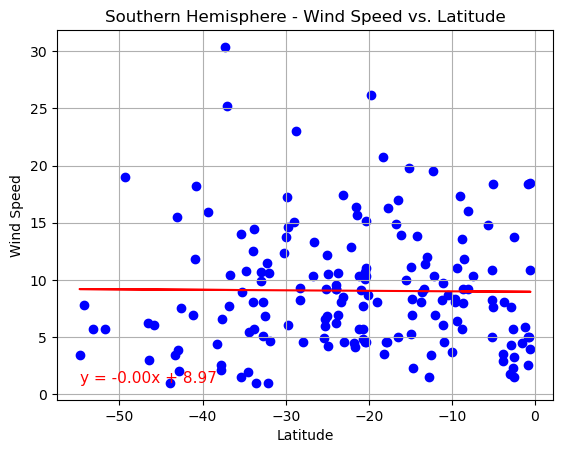

r-value is: -0.010877420135359375


In [126]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)

# Calculate the regression line
regress_values = slope * x_values + intercept

# Create a scatter plot of latitude vs. temperature
plt.scatter(x_values, y_values, color='blue', label='Data Points')

# Plot the regression line
plt.plot(x_values, regress_values, color='red', label='Linear Regression')

# Add labels and title
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude')

# Add model's formula and r-value to the plot
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"  # Model's formula
r_squared = f"R-squared = {rvalue**2:.2f}"       # r-value
plt.annotate(line_eq, (x_values.min(), y_values.min()), fontsize=11, color='red', ha='left')
plt.grid(True)

# Show plot
plt.show()
print("r-value is:", rvalue)

**Discussion about the linear relationship:** Both scatter plots depicting wind speed versus latitude in the Northern and Southern Hemisphere datasets exhibit similarities in the distribution of data points and the appearance of the linear regression lines. The minimal change observed in both regression lines suggests that latitude may not have a discernible influence on wind speeds. This consistency across hemispheres implies that other factors likely play a more significant role in determining wind patterns, overshadowing any direct correlation with latitude.